In [73]:
# Import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [188]:
data = pd.read_excel("C:/Users/Sushanth S/Class Lectures/Module-2/Lecture-5/NLP_Project/Labelled_data.xlsx")

In [189]:
data.head()

,Unnamed: 0,review,Cleaned Reviews,POS_tagged,Lemma,Vader Sentiment,Sentiment
0,0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,"[('Mr', 'n'), ('Costner', 'n'), ('dragged', 'v...",Mr Costner drag movie far long necessary Asi...,0.9373,Positive
1,1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,"[('Story', 'n'), ('man', 'n'), ('unnatural', '...",Story man unnatural feeling pig Starts openi...,0.8176,Positive
2,2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,"[('Bromwell', 'n'), ('High', 'n'), ('cartoon',...",Bromwell High cartoon comedy run time progra...,-0.1027,Neutral
3,3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,"[('OK', None), ('best', 'a'), ('film', 'n'), (...",OK best film ever see time able sit watch TW...,0.9222,Positive
4,4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,"[('looking', 'v'), ('forward', 'r'), ('movie',...",look forward movie Trustworthy actor interes...,0.9353,Positive


In [190]:
# inorder to remove unnamed row:
mydata = data.drop('Unnamed: 0', axis=1)
mydata.head()

,review,Cleaned Reviews,POS_tagged,Lemma,Vader Sentiment,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,"[('Mr', 'n'), ('Costner', 'n'), ('dragged', 'v...",Mr Costner drag movie far long necessary Asi...,0.9373,Positive
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,"[('Story', 'n'), ('man', 'n'), ('unnatural', '...",Story man unnatural feeling pig Starts openi...,0.8176,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,"[('Bromwell', 'n'), ('High', 'n'), ('cartoon',...",Bromwell High cartoon comedy run time progra...,-0.1027,Neutral
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,"[('OK', None), ('best', 'a'), ('film', 'n'), (...",OK best film ever see time able sit watch TW...,0.9222,Positive
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,"[('looking', 'v'), ('forward', 'r'), ('movie',...",look forward movie Trustworthy actor interes...,0.9353,Positive


In [191]:
# inorder to remove unnamed row:
mydata = mydata.drop(['POS_tagged'], axis=1)
mydata.head()

,review,Cleaned Reviews,Lemma,Vader Sentiment,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,Mr Costner drag movie far long necessary Asi...,0.9373,Positive
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,Story man unnatural feeling pig Starts openi...,0.8176,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,Bromwell High cartoon comedy run time progra...,-0.1027,Neutral
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,OK best film ever see time able sit watch TW...,0.9222,Positive
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,look forward movie Trustworthy actor interes...,0.9353,Positive


In [192]:
data = mydata[['review','Sentiment']]

In [193]:
data.head()

,review,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Positive
1,Story of a man who has unnatural feelings for ...,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Neutral
3,OK its not the best film I've ever seen but at...,Positive
4,I was looking forward to this movie. Trustwort...,Positive


## Pre-process Data
We need to remove the package name as it’s not relevant. Then convert text to lowercase for CSV data. So, this is the data pre-process stage.

In [80]:
def preprocess_data(data):
    
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data

In [81]:
data = preprocess_data(data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Splitting Data
First, separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets.

In [82]:
# Split into training and testing data
x = data['review']
y = data['Sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

### Vectorize text reviews to numbers.

In [83]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

## Model Generation
After splitting and vectorize text reviews into numbers, we will generate a random forest model on the training set and perform prediction on test set features.

## Multinomial Naive Bayes application

In [84]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
model.score(x_test, y_test)

0.6575875486381323

In [93]:
model.predict(vec.transform(['not recommended']))

array(['Positive'], dtype='<U8')

In [87]:
predicted = model.predict(x_test)


from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    Negative       0.66      0.71      0.69        91
     Neutral       0.00      0.00      0.00        38
    Positive       0.66      0.81      0.73       128

    accuracy                           0.66       257
   macro avg       0.44      0.51      0.47       257
weighted avg       0.56      0.66      0.61       257



## Simple ensemble techniques

    > Max Voting
    > Averaging
    > Weighted Averaging

In [97]:
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.ensemble import VotingClassifier


In [98]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [99]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

In [102]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

Accuracy: 0.69 (+/- 0.02) [Logistic Regression]
Accuracy: 0.63 (+/- 0.03) [Random Forest]
Accuracy: 0.54 (+/- 0.02) [naive Bayes]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

Accuracy: 0.67 (+/- 0.02) [Ensemble]


In [106]:
clf1.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_pred = clf1.predict(x_test)

In [111]:
model.score(x,y)

0.9481193255512321

In [112]:
model.score(x_test,y_pred)

0.8054474708171206

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, clf1.predict(x))

array([[273,   0,   0],
       [  0, 113,   0],
       [  0,   0, 385]], dtype=int64)

In [119]:
print(classification_report(y, clf1.predict(x)))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       273
     Neutral       1.00      1.00      1.00       113
    Positive       1.00      1.00      1.00       385

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771



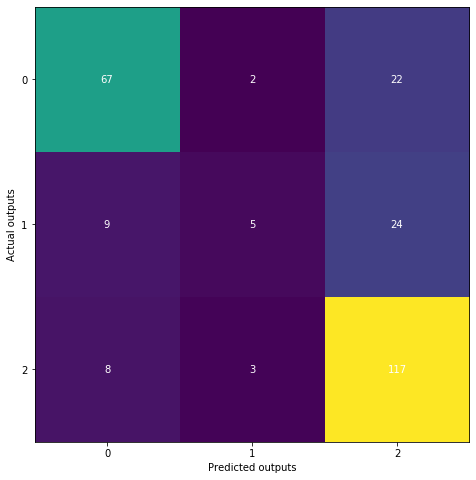

In [130]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [177]:
print(x_test.shape)

(257, 14218)


In [178]:
print(x.shape)

(771, 14218)


In [ ]:
model = clf1.predict()

# Logistic Regression

In [194]:
data_copy = data.copy()

In [195]:
data_copy.head()

,review,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Positive
1,Story of a man who has unnatural feelings for ...,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Neutral
3,OK its not the best film I've ever seen but at...,Positive
4,I was looking forward to this movie. Trustwort...,Positive


In [202]:

replace_map_comp = {'Sentiment': {'Negative': -1, 'Positive': 1, 'Neutral': 0}}

print(replace_map_comp)

{'Sentiment': {'Negative': -1, 'Positive': 1, 'Neutral': 0}}


In [203]:
data_copy.replace(replace_map_comp, inplace=True)

print(data_copy.head())

                                              review  Sentiment
0  Once again Mr. Costner has dragged out a movie...          1
1  Story of a man who has unnatural feelings for ...          1
2  Bromwell High is a cartoon comedy. It ran at t...          0
3  OK its not the best film I've ever seen but at...          1
4  I was looking forward to this movie. Trustwort...          1


In [204]:
from sklearn.model_selection import train_test_split

# split the dataset in train and test
X = data_copy['review']
y = data_copy['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## Removing special characters and "trash"
We still se a very uneaven distribution. If you look closer, you'll see that we're also taking into consideration punctuation signs ('-', ',', etc) and other html tags like &amp. We can definitely remove them for the sentiment analysis, but we will try to keep the emoticons, since those do have a sentiment load:

In [209]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

print(preprocessor('This!! twit man :) is <b>nice</b>'))

this twit man is nice :)


In [210]:
# tokenizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
stop = stopwords.words('english')

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [212]:
# Note: This may take a long while to execute, like... 1 or 2 hours
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [213]:
print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__preprocessor': <function preprocessor at 0x00000200E069F438>, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',

In [215]:
clf = gs_lr_tfidf.best_estimator_
print('Accuracy in test: %.3f' % clf.score(X_test, y_test))

Accuracy in test: 0.686


In [221]:
twits = [
    "This is really bad, I don't like it at all",
    "I love this!",
    "let me try out expecting results",
    "I'm sad... :("
]

preds = clf.predict(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> {preds[i]}')

This is really bad, I don't like it at all --> -1
I love this! --> 1
let me try out expecting results --> -1
I'm sad... :( --> 1
